# 数据处理可视化的最有价值的 50 张图（下）

## 设置

In [2]:
# 加载相应的包，并进行全局的设置 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import warnings; warnings.simplefilter('ignore')
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

In [6]:
plt.rcParams['font.sans-serif']=['Simhei'] # 加载中文支持的字体
plt.rcParams['axes.unicode_minus']=False   # 加载负数符号

## 第五章 组成图 Composition

### 31/50 华夫饼图 (Waffle Chart)

该waffle图表可以使用该pywaffle软件包创建，用于显示更大人群中的群体组成。

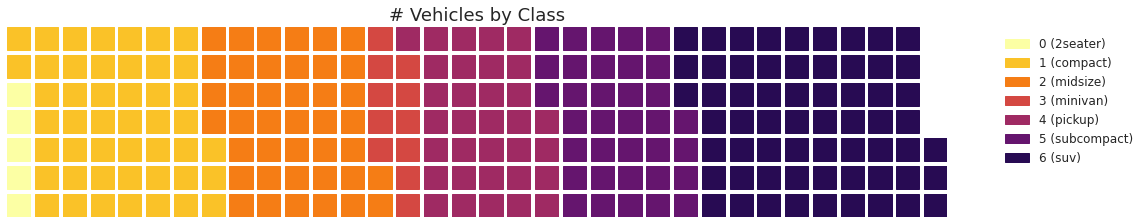

In [12]:
# ! pip install pywaffle
# Reference: https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart
# 导入华夫包
from pywaffle import Waffle

# 加载数据
df_raw = pd.read_csv("./data/mpg_ggplot2.csv")

# 将数据分类聚合
df = df_raw.groupby('class').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {  #用子图的方式
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['class', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)

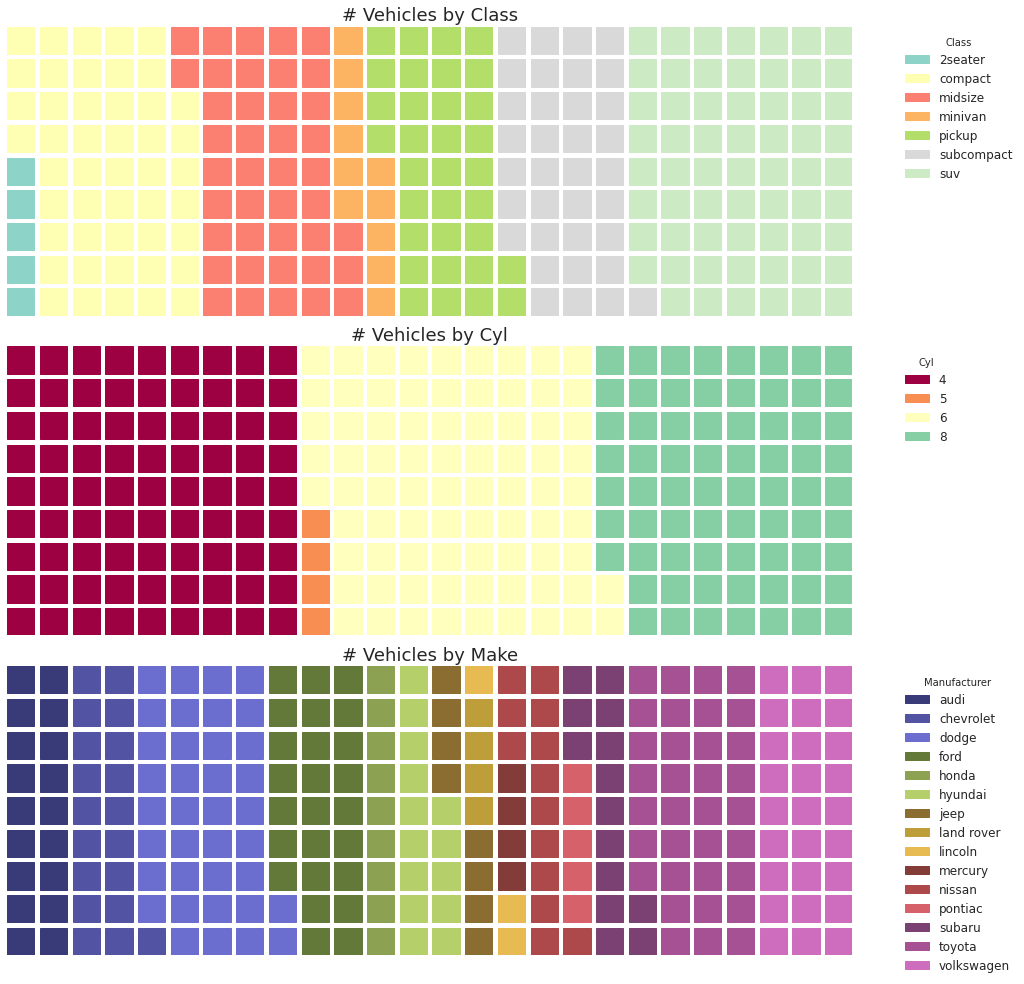

In [13]:
#! pip install pywaffle
from pywaffle import Waffle

# 不同方式显示

# Import
# df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# 
# 按分类数据 画图
df_class = df_raw.groupby('class').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]

# By Cylinders Data
df_cyl = df_raw.groupby('cyl').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]

# By Make Data
df_make = df_raw.groupby('manufacturer').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
colors_make = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]


# 画子图 及 修饰
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': {
            'values': df_class['counts_class'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_class[['class', 'counts_class']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Class'},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18},
            'colors': colors_class
        },
        '312': {
            'values': df_cyl['counts_cyl'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_cyl[['cyl', 'counts_cyl']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Cyl'},
            'title': {'label': '# Vehicles by Cyl', 'loc': 'center', 'fontsize':18},
            'colors': colors_cyl
        },
        '313': {
            'values': df_make['counts_make'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_make[['manufacturer', 'counts_make']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Manufacturer'},
            'title': {'label': '# Vehicles by Make', 'loc': 'center', 'fontsize':18},
            'colors': colors_make
        }
    },
    rows=9,
    figsize=(16, 14)
)

### 32/50 饼图 (Pie Chart)

饼图是显示组构成的经典方式。但是，现在通常不建议使用它，因为馅饼部分的面积有时会产生误导。因此，如果您要使用饼图，强烈建议明确写下饼图每个部分的百分比或数字。

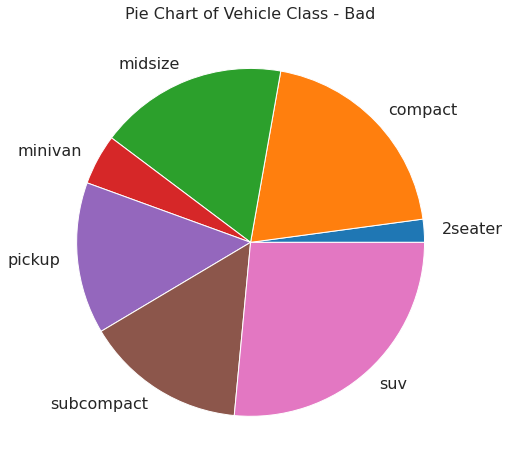

In [18]:
# 加载数据
df_raw = pd.read_csv("./data/mpg_ggplot2.csv")

#  分组
df = df_raw.groupby('class').size()

# 画图

# df.plot(kind='pie', subplots=True, figsize=(8, 8), dpi= 80) 原作者代码

df.plot(kind='pie', subplots=True, figsize=(8, 8))
plt.title("Pie Chart of Vehicle Class - Bad")
plt.ylabel("")
plt.show()

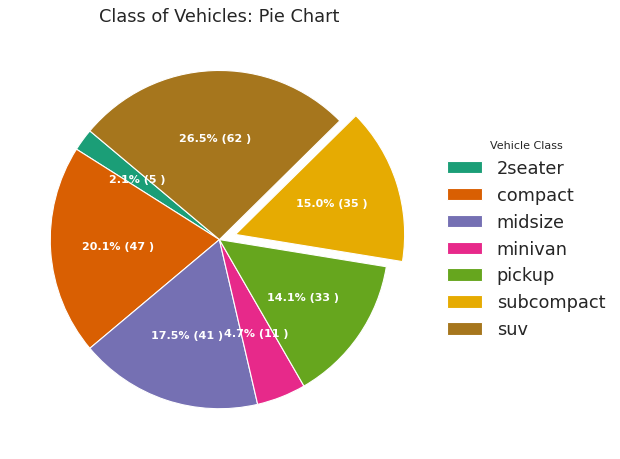

In [19]:
# Import
df_raw = pd.read_csv("./data/mpg_ggplot2.csv")

# 分类重新索引
df = df_raw.groupby('class').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df['counts']
categories = df['class']
explode = [0,0,0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# 修饰
ax.legend(wedges, categories, title="Vehicle Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()

### 33/50 树状图 (Treemap)

树形图类似于饼图，它在不误导每个组的贡献的情况下做得更好。

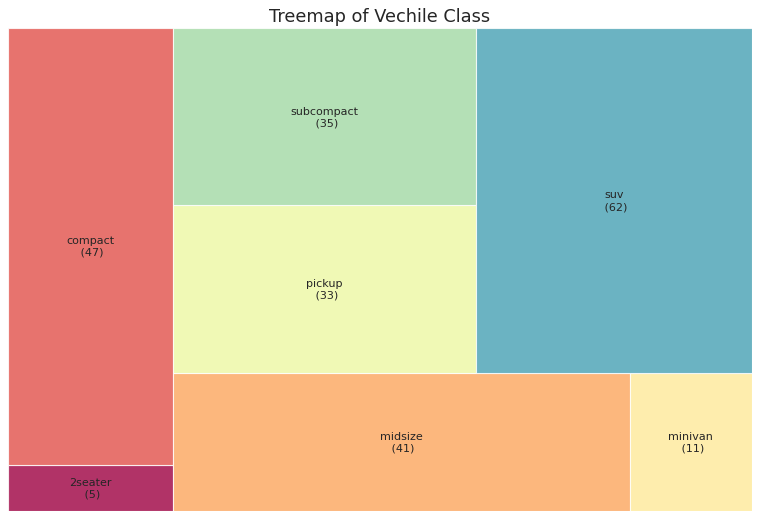

In [23]:
# !pip install squarify
import squarify 

# 导入数据
df_raw = pd.read_csv("./data/mpg_ggplot2.csv")

# 还是分类分组
df = df_raw.groupby('class').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# 修饰
plt.title('Treemap of Vechile Class')
plt.axis('off')
plt.show()

### 34/50 条形图 (Bar Chart)

条形图是基于计数或任何给定指标可视化项目的经典方式。在下面的图表中，我为每个项目使用了不同的颜色，但您通常可能希望为所有项目选择一种颜色，除非您按组为它们着色。颜色名称存储在all_colors下面的代码中。color您可以通过设置参数来更改条形的颜色。

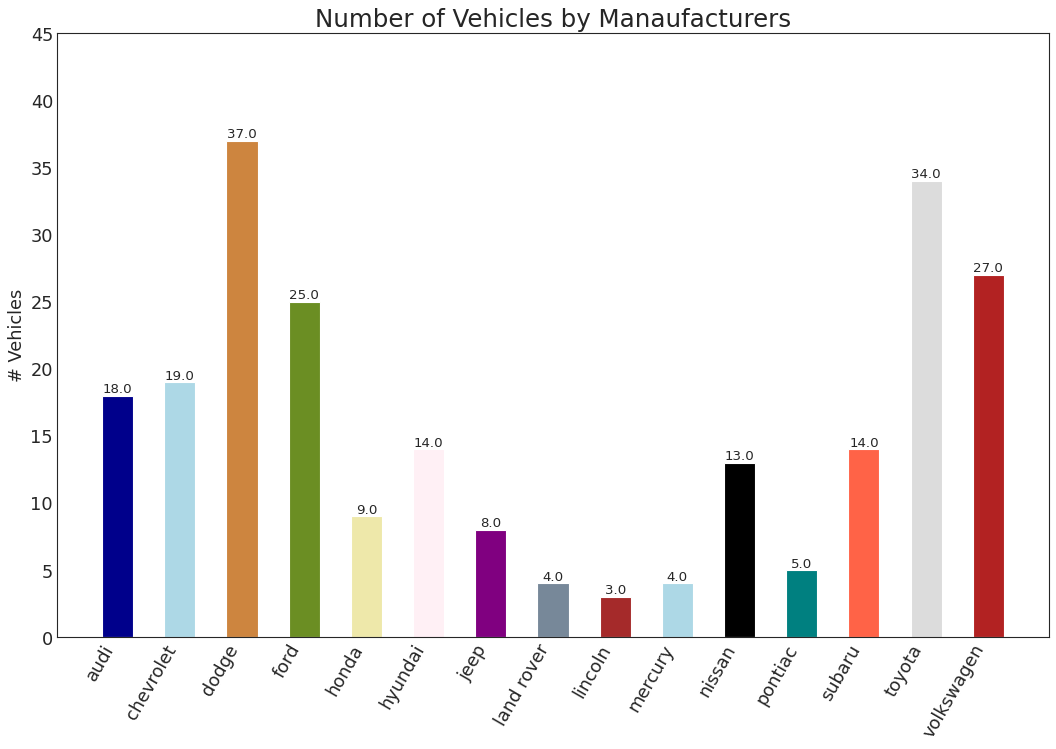

In [24]:
import random

# 加载数据
df_raw = pd.read_csv("./data/mpg_ggplot2.csv")

# 分类分组
df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
n = df['manufacturer'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# 条形图
plt.figure(figsize=(16,10), dpi= 80)
plt.bar(df['manufacturer'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# 修饰
plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment= 'right')
plt.title("Number of Vehicles by Manaufacturers", fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 45)
plt.show()

## 第六章 时间序列 (Time Series)

### 35/50 Time 时间序列图 (Time Series Plot)

时间序列图用于可视化给定指标如何随时间变化。在这里，您可以看到 1949 年至 1969 年间航空客运量的变化情况。

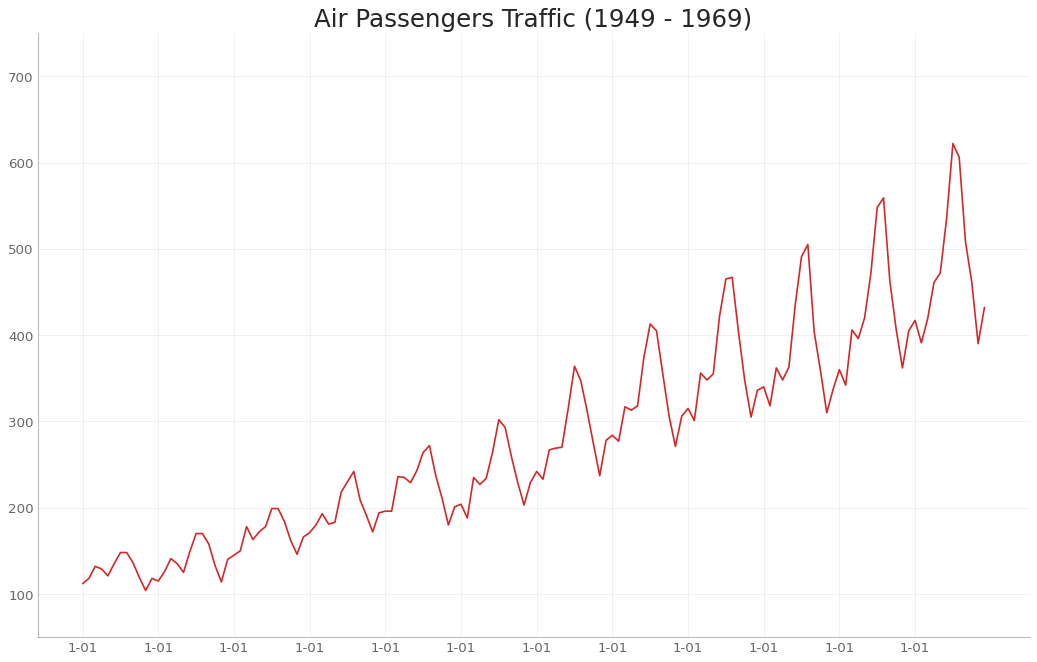

In [38]:
# 导入 数据
df = pd.read_csv('./data/AirPassengers.csv')

# 画图
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'traffic', data=df, color='tab:red')

# 修饰
plt.ylim(50, 750)
xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-4:] for x in df.date.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=0, fontsize=12, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='both', alpha=.3)

# Remove borders
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.3)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.3)   
plt.show()

### 36/50 带注释的波峰和波谷的时间序列 (Time Series with Peaks and Troughs Annotated)

下面的时间序列绘制了所有的高峰和低谷，并注释了所选特殊事件的发生。

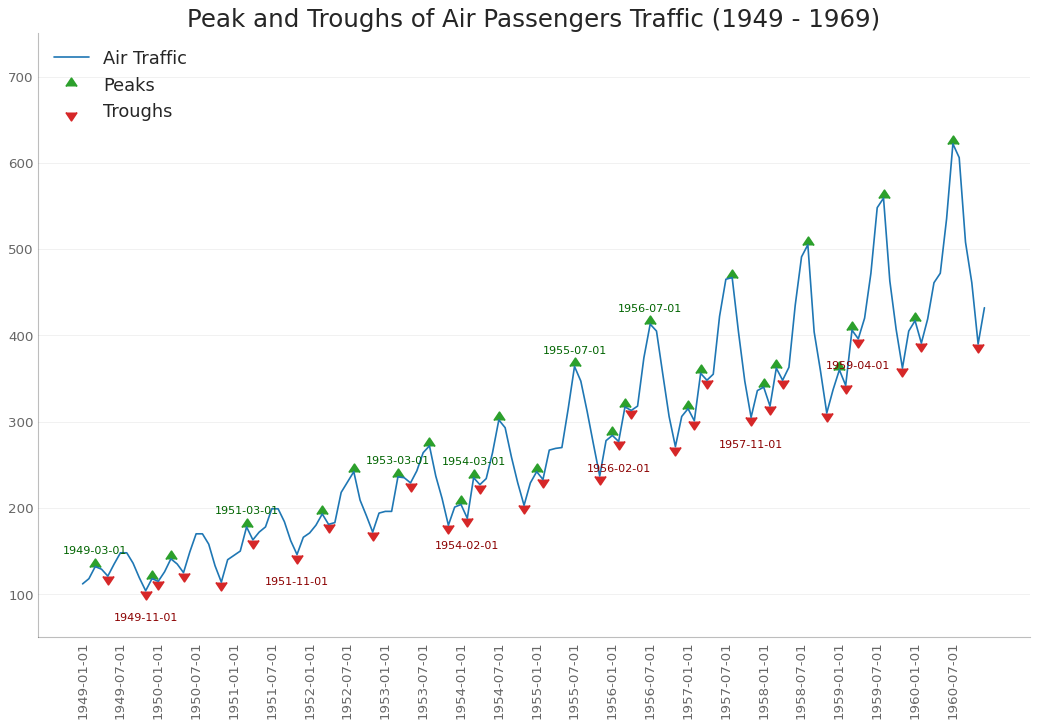

In [39]:
# 加载数据
df = pd.read_csv('./data/AirPassengers.csv')

# 获取波峰和波谷
data = df['traffic'].values
doublediff = np.diff(np.sign(np.diff(data)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# 画曲线
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('date', 'traffic', data=df, color='tab:blue', label='Air Traffic')
plt.scatter(df.date[peak_locations], df.traffic[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(df.date[trough_locations], df.traffic[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')

# 标注释
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.date[p], df.traffic[p]+15, df.date[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.date[t], df.traffic[t]-35, df.date[t], horizontalalignment='center', color='darkred')

# 修饰
plt.ylim(50,750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.date.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()

### 37/50 自相关 (ACF) 和偏自相关 (PACF) 图 (Autocorrelation (ACF) and Partial Autocorrelation (PACF) Plot)

ACF 图显示了时间序列与其自身滞后的相关性。每条垂直线（在自相关图上）表示序列与其从滞后 0 开始的滞后之间的相关性。图中的蓝色阴影区域是显着性水平。蓝线以上的滞后是显着滞后。那么如何解释这个呢？对于 AirPassengers，我们看到多达 14 次滞后已越过蓝线，因此意义重大。这意味着，14 年前的航空客运量对今天的交通量产生了影响。另一方面，PACF 显示了任何给定滞后（时间序列）与当前序列的自相关，但消除了滞后之间的贡献。

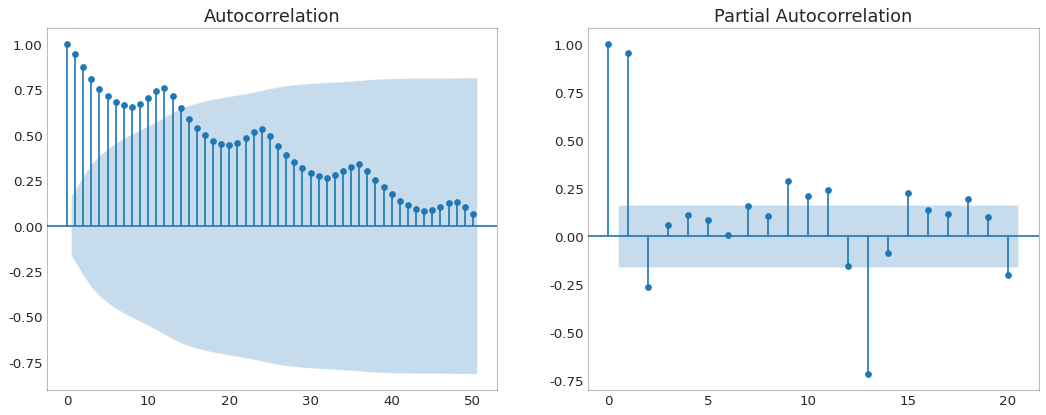

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 加载数据
df = pd.read_csv('./data/AirPassengers.csv')

# 画图
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(df.traffic.tolist(), ax=ax1, lags=50)
plot_pacf(df.traffic.tolist(), ax=ax2, lags=20)

# 修饰
# 画边框
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# 坐标字体
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()

### 38/50 交叉相关图 (Cross Correlation Plot)

交叉相关图显示了两个时间序列彼此的滞后。

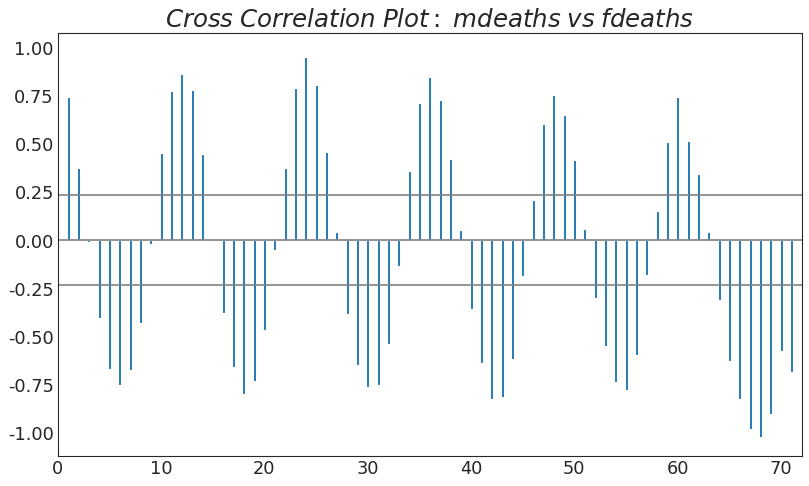

In [44]:
import statsmodels.tsa.stattools as stattools

# 加载数据
df = pd.read_csv('./data/mortality.csv')

x = df['mdeaths']
y = df['fdeaths']

# 计算交叉相关性
ccs = stattools.ccf(x, y)[:100]
nlags = len(ccs)

# 计算 显著性水平
# ref: https://stats.stackexchange.com/questions/3115/cross-correlation-significance-in-r/3128#3128
conf_level = 2 / np.sqrt(nlags)

# 画图
plt.figure(figsize=(12,7), dpi= 80)

plt.hlines(0, xmin=0, xmax=100, color='gray')  # 0 axis
plt.hlines(conf_level, xmin=0, xmax=100, color='gray')
plt.hlines(-conf_level, xmin=0, xmax=100, color='gray')

plt.bar(x=np.arange(len(ccs)), height=ccs, width=.3)

# 修饰
plt.title('$Cross\; Correlation\; Plot:\; mdeaths\; vs\; fdeaths$', fontsize=22)
plt.xlim(0,len(ccs))
plt.show()

### 39/50 时间序列分解图 (Time Series Decomposition Plot)

时间序列分解图显示时间序列分解为趋势、季节性和残差分量。

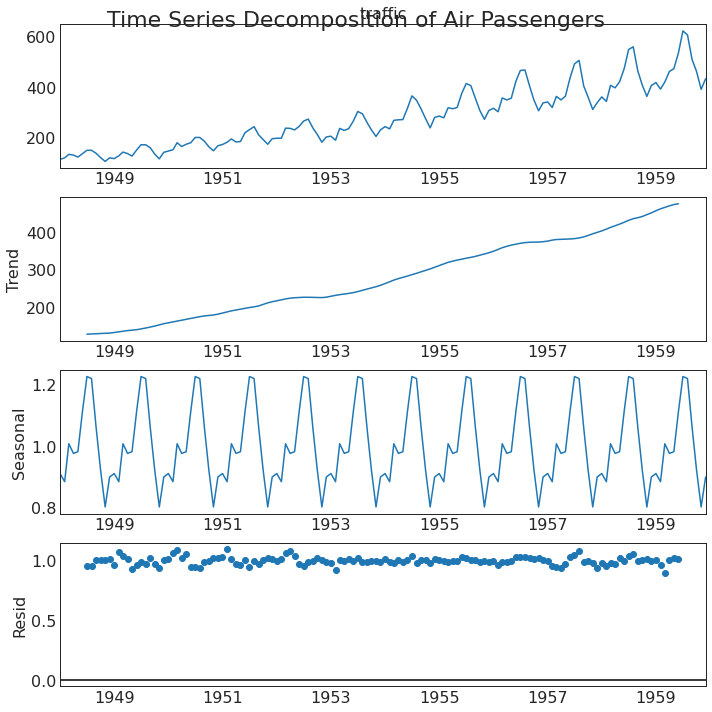

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# 导入数据
df = pd.read_csv('./data/AirPassengers.csv')
dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
df.set_index(dates, inplace=True)

# 分解 (相乘方式)
result = seasonal_decompose(df['traffic'], model='multiplicative')

# 画图
plt.rcParams.update({'figure.figsize': (10,10)})
result.plot().suptitle('Time Series Decomposition of Air Passengers')
plt.show()

### 40/50 多重时间序列 (Multiple Time Series)

您可以在同一图表上绘制多个测量相同值的时间序列，如下所示

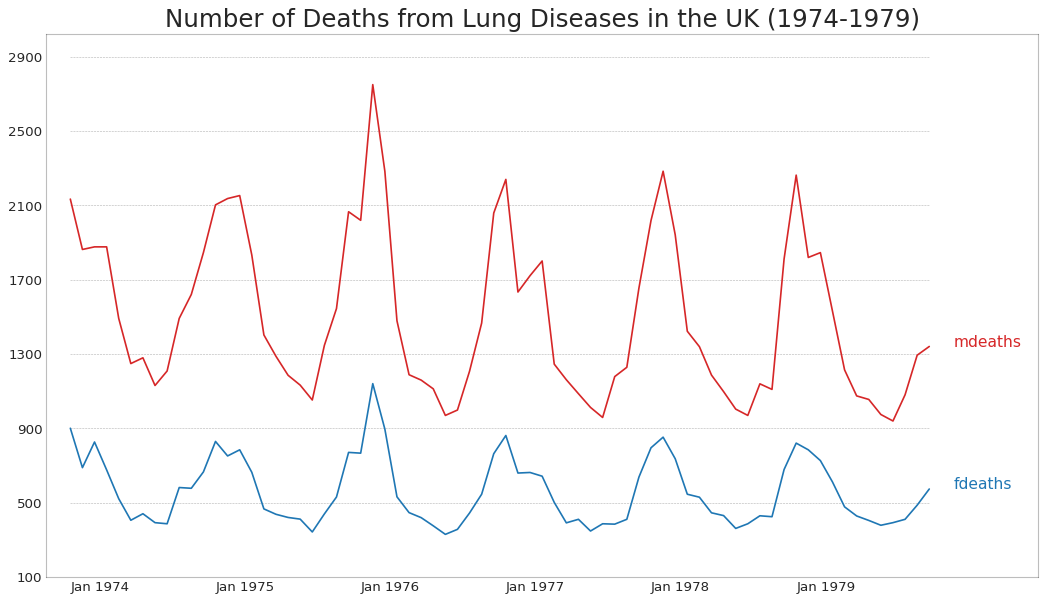

In [48]:
# 导入数据
df = pd.read_csv('./data/mortality.csv')

# 定义 Y 最大最小区间，刻度和颜色
y_LL = 100
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval = 400
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']    

# 图和注释
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)    

columns = df.columns[1:]  
for i, column in enumerate(columns):    
    plt.plot(df.date.values, df[column].values, lw=1.5, color=mycolors[i])    
    plt.text(df.shape[0]+1, df[column].values[-1], column, fontsize=14, color=mycolors[i])

# 画细线
for y in range(y_LL, y_UL, y_interval):    
    plt.hlines(y, xmin=0, xmax=71, colors='black', alpha=0.3, linestyles="--", lw=0.5)

# 修饰  
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)        

# Lighten borders
plt.gca().spines["top"].set_alpha(.3)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.3)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Number of Deaths from Lung Diseases in the UK (1974-1979)', fontsize=22)
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)], fontsize=12)    
plt.xticks(range(0, df.shape[0], 12), df.date.values[::12], horizontalalignment='left', fontsize=12)    
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)    
plt.show()

### 41/50 使用辅助 Y 轴以不同比例绘制 (Plotting with different scales using secondary Y axis)

如果您想显示在​​同一时间点测量两个不同数量的两个时间序列，您可以在右侧的第二个 Y 轴上绘制第二个序列。

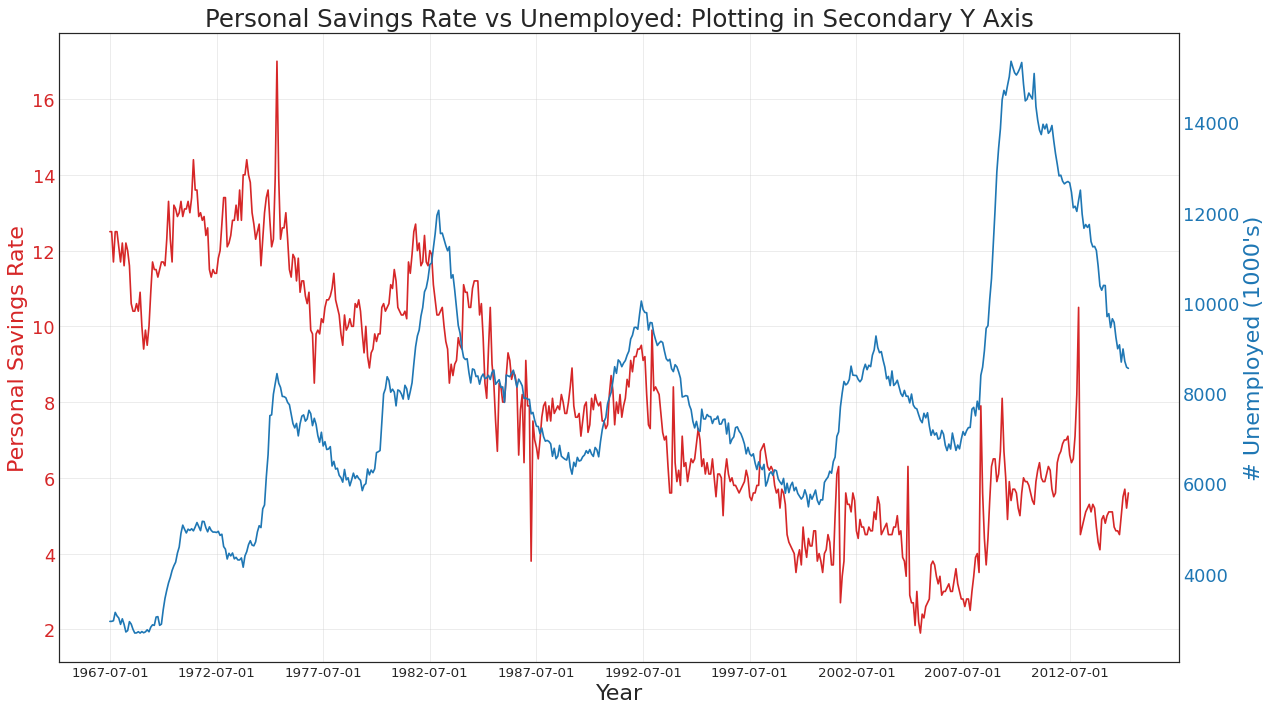

In [49]:
# 加载数据
df = pd.read_csv("./data/economics.csv")


x = df['date'] 
y1 = df['psavert'] #储蓄率
y2 = df['unemploy'] #失业

# 画线1 使用 左Y轴 
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# 画线2 使用 右Y轴 
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# 修饰
# ax1 (left Y axis) 左边 Y 轴
ax1.set_xlabel('Year', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Personal Savings Rate', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis) 右边 Y 轴
ax2.set_ylabel("# Unemployed (1000's)", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Personal Savings Rate vs Unemployed: Plotting in Secondary Y Axis", fontsize=22)
fig.tight_layout()
plt.show()

### 42/50 带误差带的时间序列 (Time Series with Error Bands)

如果您有一个时间序列数据集，每个时间点（日期/时间戳）有多个观测值，则可以构建具有误差带的时间序列。您可以在下面看到几个基于一天中不同时间收到的订单的示例。另一个例子是在 45 天内到达的订单数量。在这种方法中，订单数量的平均值由白线表示。并且围绕平均值计算和绘制 95% 的置信区间。

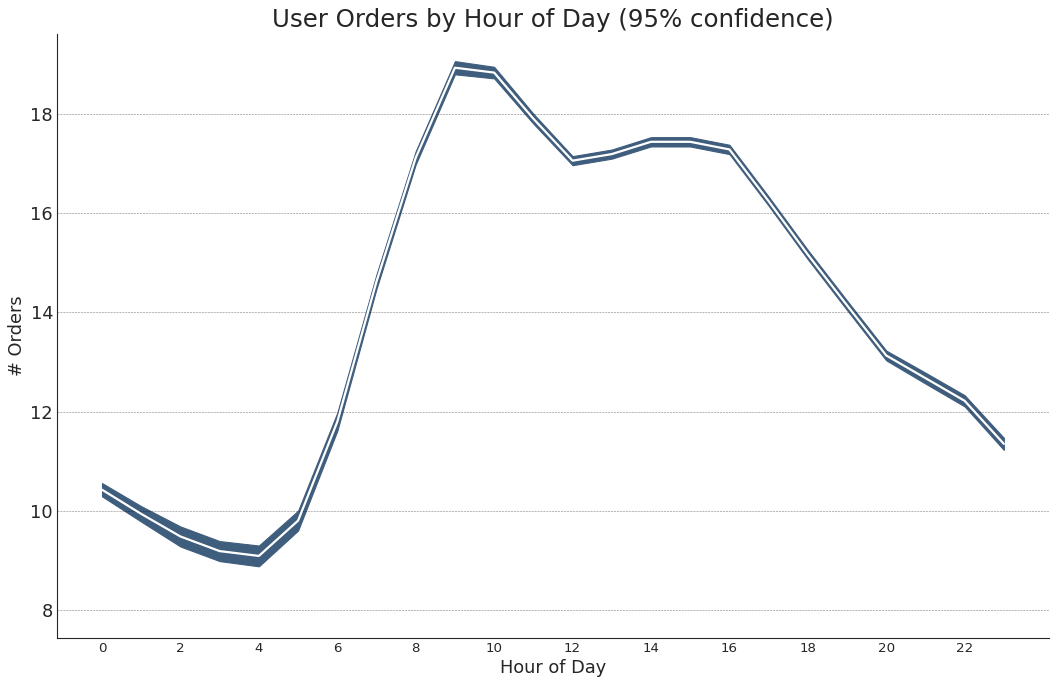

In [51]:
from scipy.stats import sem

# 加载数据
df = pd.read_csv("./data/user_orders_hourofday.csv")
df_mean = df.groupby('order_hour_of_day').quantity.mean()
df_se = df.groupby('order_hour_of_day').quantity.apply(sem).mul(1.96)

# 画 95%的置信区间
plt.figure(figsize=(16,10), dpi= 80)
plt.ylabel("# Orders", fontsize=16)  
x = df_mean.index
plt.plot(x, df_mean, color="white", lw=2) 
plt.fill_between(x, df_mean - df_se, df_mean + df_se, color="#3F5D7D")  

# 修饰
# 画边框
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.xticks(x[::2], [str(d) for d in x[::2]] , fontsize=12)
plt.title("User Orders by Hour of Day (95% confidence)", fontsize=22)
plt.xlabel("Hour of Day")

s, e = plt.gca().get_xlim()
plt.xlim(s, e)

# Draw Horizontal Tick lines  
for y in range(8, 20, 2):    
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5)

plt.show()

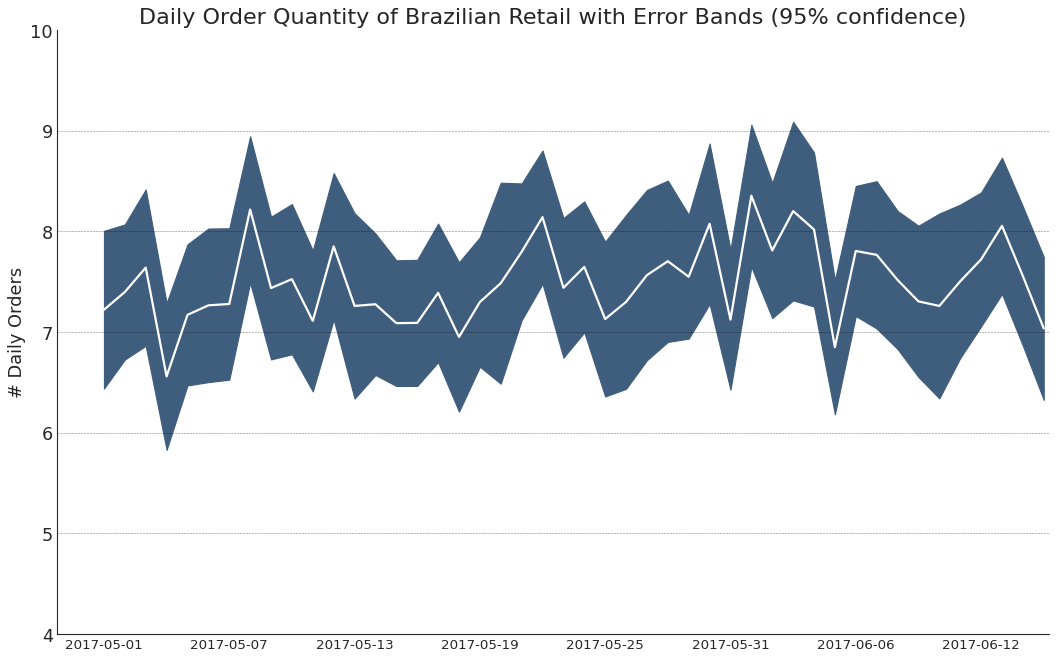

In [55]:
"Data Source: https://www.kaggle.com/olistbr/brazilian-ecommerce#olist_orders_dataset.csv"
from dateutil.parser import parse
from scipy.stats import sem

# 导入数据
df_raw = pd.read_csv('./data/orders_45d.csv', 
                     parse_dates=['purchase_time', 'purchase_date'])

# 准备 每日的均值和 1.96 标准偏带
df_mean = df_raw.groupby('purchase_date').quantity.mean()
df_se = df_raw.groupby('purchase_date').quantity.apply(sem).mul(1.96)

# 画图
plt.figure(figsize=(16,10), dpi= 80)
plt.ylabel("# Daily Orders", fontsize=16)  
x = [d.date().strftime('%Y-%m-%d') for d in df_mean.index]
plt.plot(x, df_mean, color="white", lw=2) 
plt.fill_between(x, df_mean - df_se, df_mean + df_se, color="#3F5D7D")  

# 修饰
# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(1)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(1)
plt.xticks(x[::6], [str(d) for d in x[::6]] , fontsize=12)
plt.title("Daily Order Quantity of Brazilian Retail with Error Bands (95% confidence)", fontsize=20)

# 坐标轴
s, e = plt.gca().get_xlim()
plt.xlim(s, e-2)
plt.ylim(4, 10)

# 画水平带  
for y in range(5, 10, 1):    
    plt.hlines(y, xmin=s, xmax=e, colors='black', alpha=0.5, linestyles="--", lw=0.5)

plt.show()

### 43/50 面积堆积图 (Stacked Area Chart)

面积堆积图直观地表示了多个时间序列的贡献程度，以便于相互比较。

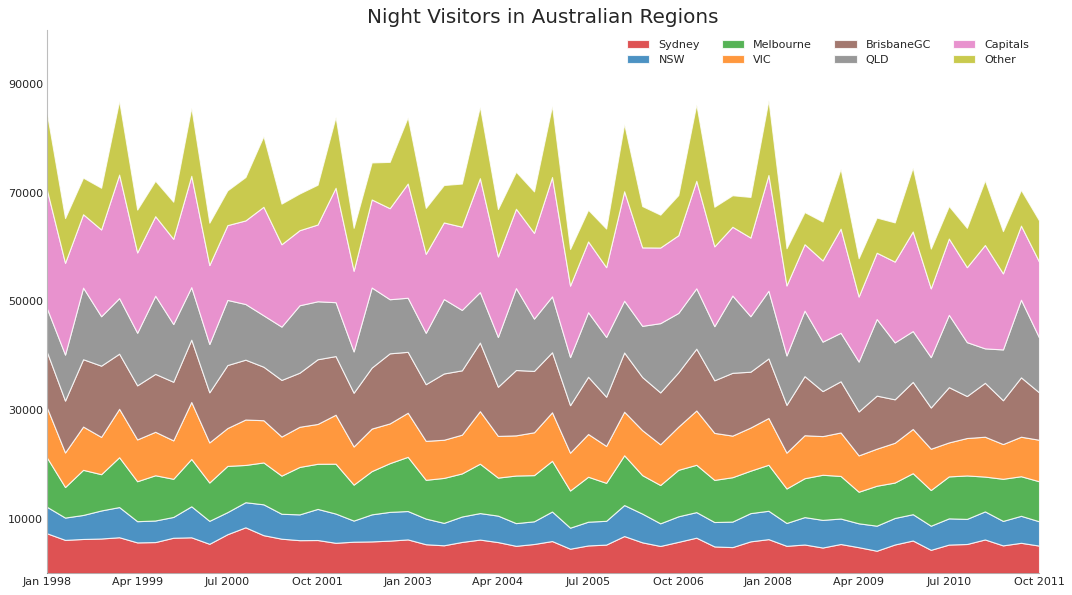

In [56]:
# 导入数据
df = pd.read_csv('./data/nightvisitors.csv')

# 确定颜色 
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      

# 画图 
fig, ax = plt.subplots(1,1,figsize=(16, 9), dpi= 80)
columns = df.columns[1:]
labs = columns.values.tolist()

# 准备数据
x  = df['yearmon'].values.tolist()
y0 = df[columns[0]].values.tolist()
y1 = df[columns[1]].values.tolist()
y2 = df[columns[2]].values.tolist()
y3 = df[columns[3]].values.tolist()
y4 = df[columns[4]].values.tolist()
y5 = df[columns[5]].values.tolist()
y6 = df[columns[6]].values.tolist()
y7 = df[columns[7]].values.tolist()
y = np.vstack([y0, y2, y4, y6, y7, y5, y1, y3])

# 为每列画图
labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, colors=mycolors, alpha=0.8)

# 修饰
ax.set_title('Night Visitors in Australian Regions', fontsize=18)
ax.set(ylim=[0, 100000])
ax.legend(fontsize=10, ncol=4)
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(10000, 100000, 20000), fontsize=10)
plt.xlim(x[0], x[-1])

# 画边框
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.show()

### 44/50 面积相减图 (Area Chart UnStacked)

面积相减图用于可视化两个或多个系列相对于彼此的进度（上升和下降）。在下面的图表中，您可以清楚地看到个人储蓄率如何随着失业持续时间中位数的增加而下降。未堆叠的面积图很好地表现了这种现象。

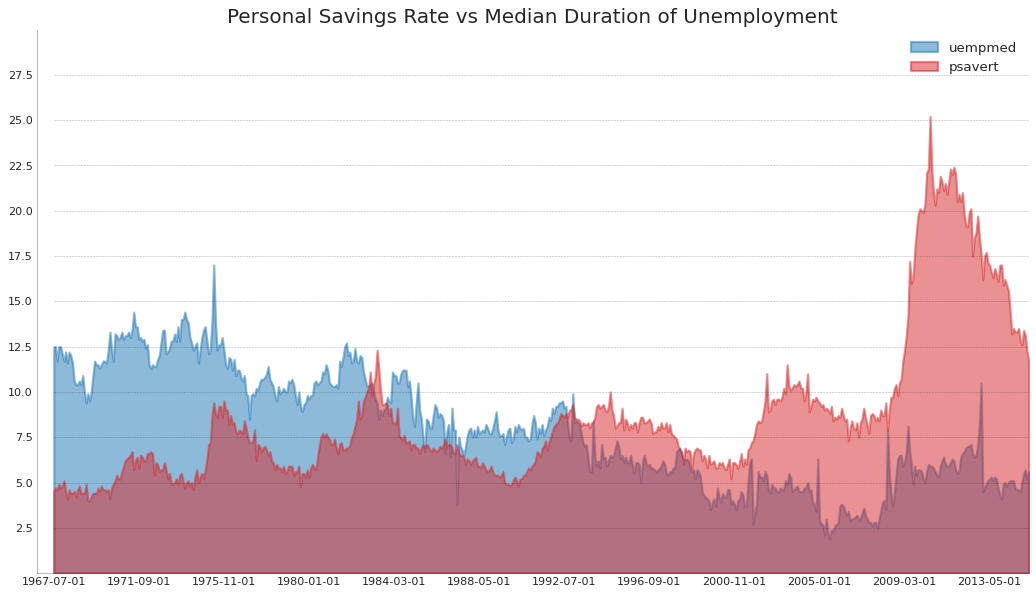

In [57]:
# 导入数据
df = pd.read_csv("./data/economics.csv")

# 准备数据
x = df['date'].values.tolist()
y1 = df['psavert'].values.tolist()
y2 = df['uempmed'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive']      
columns = ['psavert', 'uempmed']

# 画图 
fig, ax = plt.subplots(1, 1, figsize=(16,9), dpi= 80)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)

# 修饰
ax.set_title('Personal Savings Rate vs Median Duration of Unemployment', fontsize=18)
ax.set(ylim=[0, 30])
ax.legend(loc='best', fontsize=12)
plt.xticks(x[::50], fontsize=10, horizontalalignment='center')
plt.yticks(np.arange(2.5, 30.0, 2.5), fontsize=10)
plt.xlim(-10, x[-1])

# 画Y轴的刻度线  
for y in np.arange(2.5, 30.0, 2.5):    
    plt.hlines(y, xmin=0, xmax=len(x), colors='black', alpha=0.3, linestyles="--", lw=0.5)

# 画边框
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()

### 45/50 日历热图 (Calendar Heat Map)

与时间序列相比，日历地图是可视化基于时间的数据的替代且不太受欢迎的选项。虽然在视觉上很吸引人，但数值并不是很明显。然而，它在很好地描绘极端值和假日效果方面是有效的。

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


<Figure size 1280x800 with 0 Axes>

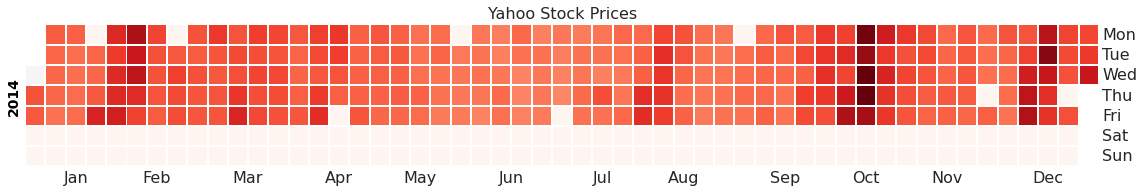

In [60]:
import matplotlib as mpl
import calmap

# 导入数据
df = pd.read_csv("./data/yahoo.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

# 画图
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(df['2014']['VIX.Close'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Yahoo Stock Prices'})
plt.show()

### 46/50 季节性图 (Seasonal Plot)

季节图可用于比较时间序列在上一季（年/月/周等）同一天的表现。

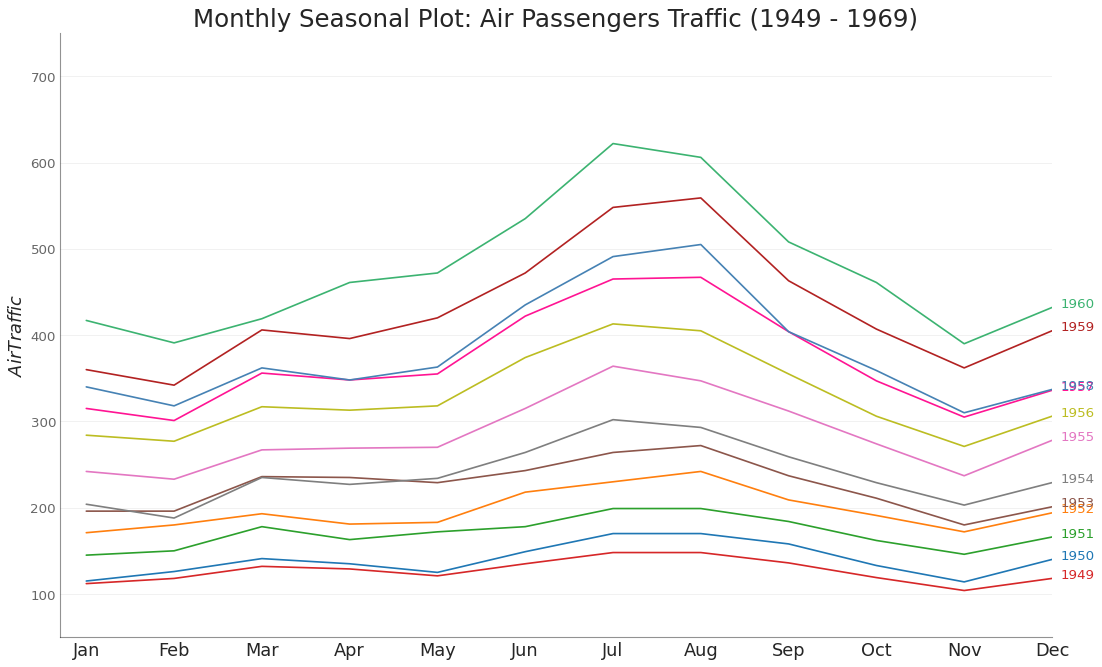

In [3]:
from dateutil.parser import parse 

# 导入数据
df = pd.read_csv('./data/AirPassengers.csv')

# 准备数据
df['year'] = [parse(d).year for d in df.date]
df['month'] = [parse(d).strftime('%b') for d in df.date]
years = df['year'].unique()

# 画图
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:brown', 'tab:grey', 'tab:pink', 'tab:olive', 'deeppink', 'steelblue', 'firebrick', 'mediumseagreen']      
plt.figure(figsize=(16,10), dpi= 80)

for i, y in enumerate(years):
    plt.plot('month', 'traffic', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
    plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'traffic'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# 修饰
plt.ylim(50,750)
plt.xlim(-0.3, 11)
plt.ylabel('$Air Traffic$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Monthly Seasonal Plot: Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.grid(axis='y', alpha=.3)

# 移除上边框
plt.gca().spines["top"].set_alpha(0.0)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.0)    
plt.gca().spines["left"].set_alpha(0.5)   
# plt.legend(loc='upper right', ncol=2, fontsize=12)
plt.show()

## 第七章 分组 (Groups)

### 47/50 树状图 (Dendrogram)

树状图根据给定的距离度量将相似的点组合在一起，并根据点的相似性将它们组织成树状链接。

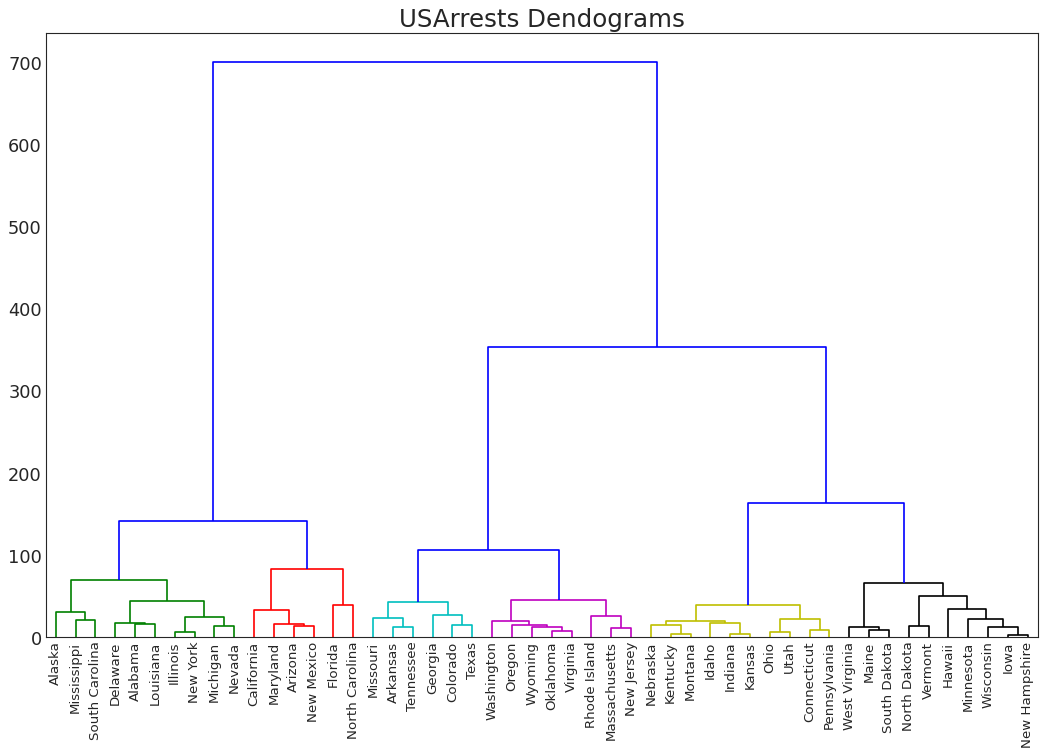

In [63]:
import scipy.cluster.hierarchy as shc

# 导入数据
df = pd.read_csv('./data/USArrests.csv')

# 画图
plt.figure(figsize=(16, 10), dpi= 80)  
plt.title("USArrests Dendograms", fontsize=22)  
dend = shc.dendrogram(shc.linkage(df[['Murder', 'Assault', 'UrbanPop', 'Rape']], method='ward'), labels=df.State.values, color_threshold=100)  
plt.xticks(fontsize=12)
plt.show()

### 48/50 聚类图 (Cluster Plot)

聚类图可用于划分属于同一聚类的点。下面是一个代表性示例，根据 USArrests 数据集将美国各州分为 5 个组。此聚类图使用“谋杀”和“袭击”列作为 X 和 Y 轴。或者，您可以使用第一个到主成分作为 X 和 Y 轴。

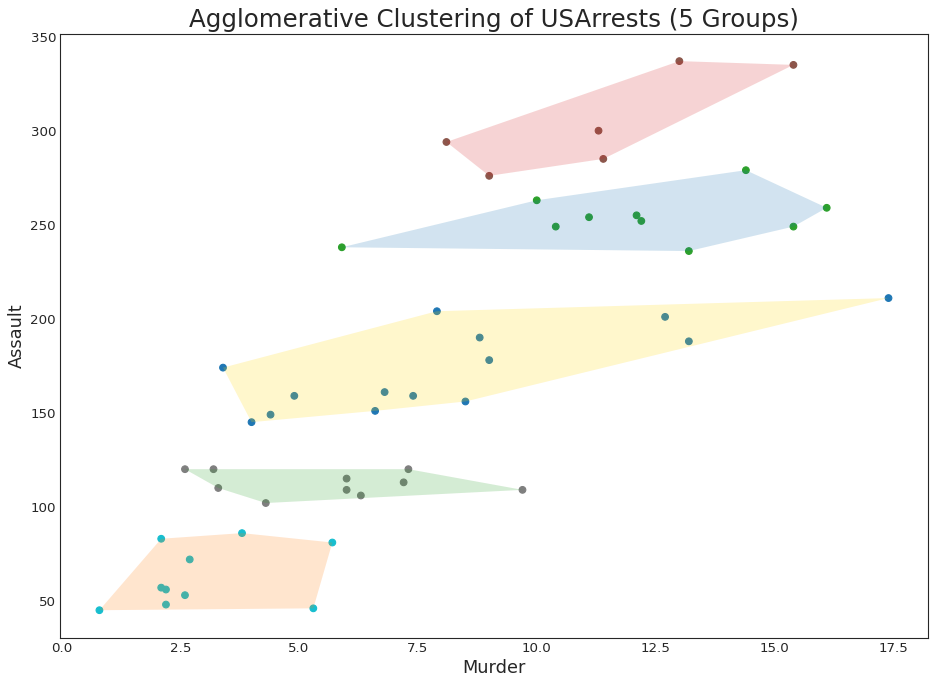

In [64]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

# 导入数据
df = pd.read_csv('./data/USArrests.csv')

# 进行聚合
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df[['Murder', 'Assault', 'UrbanPop', 'Rape']])  

# 画图
plt.figure(figsize=(14, 10), dpi= 80)  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')  

# 画边缘图 (轮廓图)
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# 画多边形轮廓图    
encircle(df.loc[cluster.labels_ == 0, 'Murder'], df.loc[cluster.labels_ == 0, 'Assault'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'Murder'], df.loc[cluster.labels_ == 1, 'Assault'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'Murder'], df.loc[cluster.labels_ == 2, 'Assault'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'Murder'], df.loc[cluster.labels_ == 3, 'Assault'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'Murder'], df.loc[cluster.labels_ == 4, 'Assault'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)

# 修饰
plt.xlabel('Murder'); plt.xticks(fontsize=12)
plt.ylabel('Assault'); plt.yticks(fontsize=12)
plt.title('Agglomerative Clustering of USArrests (5 Groups)', fontsize=22)
plt.show()

### 49/50 安德鲁斯曲线 (Andrews Curve)

安德鲁斯曲线有助于可视化是否存在基于给定分组的数字特征的固有分组。如果特征（数据集中的列）不能帮助区分组 ( ，那么这些行将不会被很好地隔离，如下所示。cyl)

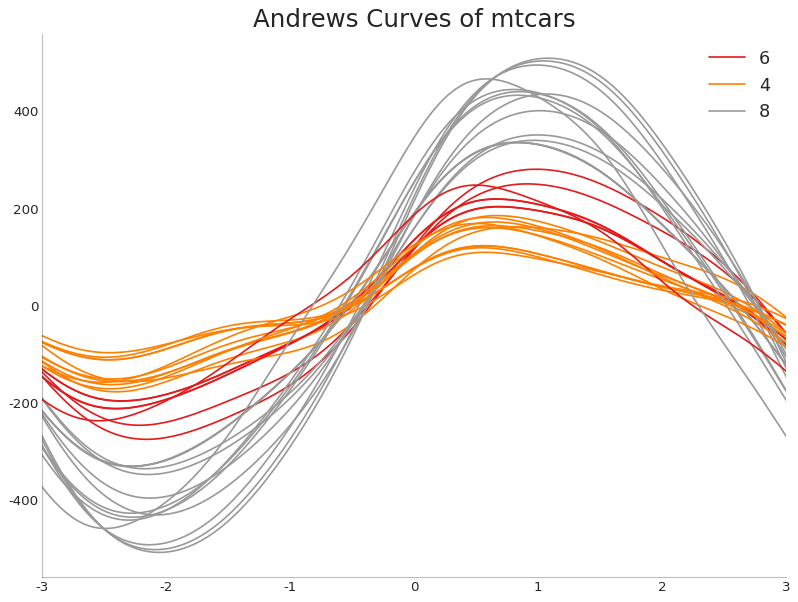

In [65]:
from pandas.plotting import andrews_curves

# 改入数据
df = pd.read_csv("./data/mtcars.csv")
df.drop(['cars', 'carname'], axis=1, inplace=True)

# 画图
plt.figure(figsize=(12,9), dpi= 80)
andrews_curves(df, 'cyl', colormap='Set1')

# 画边框
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Andrews Curves of mtcars', fontsize=22)
plt.xlim(-3,3)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### 50/50 平行坐标 (Parallel Coordinates)

In [ ]:
平行坐标有助于可视化某个特征是否有助于有效地隔离组。如果实现了隔离，则该特征可能对预测该组非常有用。

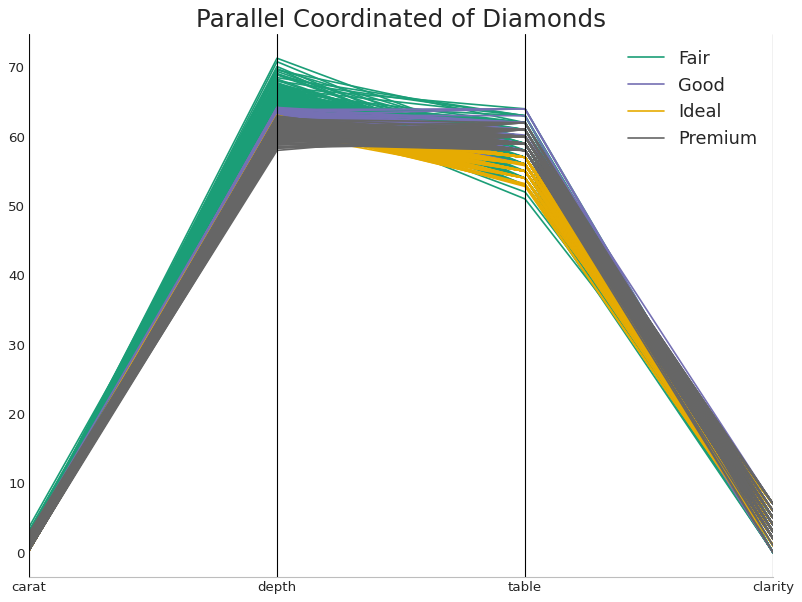

In [4]:
from pandas.plotting import parallel_coordinates

# 导入数据
df_final = pd.read_csv("./data/diamonds_filter.csv")

# 画图
plt.figure(figsize=(12,9), dpi= 80)
parallel_coordinates(df_final, 'cut', colormap='Dark2')

# 画边框
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

plt.title('Parallel Coordinated of Diamonds', fontsize=22)
plt.grid(alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()